In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import glob

### Loading Data

In [2]:
HEADER = ['Name', 'Gender', 'Frequency']

In [3]:
df = pd.DataFrame()
for file in glob.glob('Y*.txt'):
    year = int(file[1:-4])
    temp_df = pd.read_csv(file, sep=',', names=HEADER)
    temp_df['Year'] = year
    df = pd.concat([df, temp_df], ignore_index=True)

df

,Name,Gender,Frequency,Year
0,Emma,F,18765,2008
1,Isabella,F,18564,2008
2,Emily,F,17397,2008
3,Olivia,F,17030,2008
4,Ava,F,17007,2008
...,...,...,...,...
103441,Zymaire,M,5,2010
103442,Zyonne,M,5,2010
103443,Zyquarius,M,5,2010
103444,Zyran,M,5,2010


### Pivot Table

In [4]:
df.pivot_table('Frequency', columns='Gender', index='Year', aggfunc='max')

Gender,F,M
Year,,
2008,18765,22507
2009,22222,21036
2010,22731,21875


In [5]:
def func(g):
    """ <g> is a series, especially for each group """

    idx = g.idxmax()
    return df.loc[idx, 'Name'], g[idx]

In [6]:
df.pivot_table('Frequency', columns='Gender', index='Year', aggfunc=func)

Gender,F,M
Year,,
2008,"(Emma, 18765)","(Jacob, 22507)"
2009,"(Isabella, 22222)","(Jacob, 21036)"
2010,"(Isabella, 22731)","(Jacob, 21875)"


### GroupBy

In [7]:
dfs = df.sort_values(by=['Year', 'Frequency'], ascending=False)
dfs

,Name,Gender,Frequency,Year
69608,Isabella,F,22731,2010
89306,Jacob,M,21875,2010
69609,Sophia,F,20477,2010
89307,Ethan,M,17866,2010
69610,Emma,F,17179,2010
...,...,...,...,...
35001,Zymire,M,5,2008
35002,Zyquarius,M,5,2008
35003,Zyquavion,M,5,2008
35004,Zyrell,M,5,2008


In [8]:
grouped = dfs.groupby(['Year', 'Gender'])

In [9]:
grouped.first()  # it's true, because data were sorted
# grouped.agg(lambda g: g.iloc[0])

Name  Frequency
Year Gender                     
2008 F           Emma      18765
     M          Jacob      22507
2009 F       Isabella      22222
     M          Jacob      21036
2010 F       Isabella      22731
     M          Jacob      21875

In [10]:
grouped['Frequency'].describe()

count        mean         std  min  25%   50%   75%      max
Year Gender                                                                
2008 F       20416.0   92.263176  567.219896  5.0  7.0  11.0  29.0  18765.0
     M       14590.0  139.294722  932.806822  5.0  7.0  11.0  29.0  22507.0
2009 F       20123.0   90.823585  553.430324  5.0  7.0  11.0  29.0  22222.0
     M       14479.0  136.291111  892.300472  5.0  7.0  11.0  30.0  21036.0
2010 F       19698.0   89.298914  541.848393  5.0  7.0  11.0  29.0  22731.0
     M       14140.0  134.256153  860.579330  5.0  7.0  11.0  30.0  21875.0

In [11]:
def compute_probability(g):
    """ input <g> is a slice of origin df """

    g = g.copy()
    g['Probability'] = g['Frequency'] / g['Frequency'].sum()  # probability of each name per group
    return g


grouped.apply(compute_probability)  # grouped.apply() for compute for each group separately

Name Gender  Frequency  Year  Probability
Year Gender                                                       
2008 F      0            Emma      F      18765  2008     0.009962
            1        Isabella      F      18564  2008     0.009855
            2           Emily      F      17397  2008     0.009236
            3          Olivia      F      17030  2008     0.009041
            4             Ava      F      17007  2008     0.009029
...                       ...    ...        ...   ...          ...
2010 M      103441    Zymaire      M          5  2010     0.000003
            103442     Zyonne      M          5  2010     0.000003
            103443  Zyquarius      M          5  2010     0.000003
            103444      Zyran      M          5  2010     0.000003
            103445      Zzyzx      M          5  2010     0.000003

[103446 rows x 5 columns]

In [12]:
compute_probability(df)  # even we can do it over our total df

,Name,Gender,Frequency,Year,Probability
0,Emma,F,18765,2008,1.649765e-03
1,Isabella,F,18564,2008,1.632093e-03
2,Emily,F,17397,2008,1.529494e-03
3,Olivia,F,17030,2008,1.497229e-03
4,Ava,F,17007,2008,1.495206e-03
...,...,...,...,...,...
103441,Zymaire,M,5,2010,4.395856e-07
103442,Zyonne,M,5,2010,4.395856e-07
103443,Zyquarius,M,5,2010,4.395856e-07
103444,Zyran,M,5,2010,4.395856e-07


### Top n Names

In [13]:
df.groupby(['Year', 'Gender']).apply(lambda g: g.sort_values('Frequency', ascending=False)[:5])

Name Gender  Frequency  Year
Year Gender                                         
2008 F      0           Emma      F      18765  2008
            1       Isabella      F      18564  2008
            2          Emily      F      17397  2008
            3         Olivia      F      17030  2008
            4            Ava      F      17007  2008
     M      20416      Jacob      M      22507  2008
            20417    Michael      M      20524  2008
            20418      Ethan      M      20174  2008
            20419     Joshua      M      19133  2008
            20420     Daniel      M      18935  2008
2009 F      35006   Isabella      F      22222  2009
            35007       Emma      F      17830  2009
            35008     Olivia      F      17374  2009
            35009     Sophia      F      16869  2009
            35010        Ava      F      15826  2009
     M      55129      Jacob      M      21036  2009
            55130      Ethan      M      19783  2009
            55131    Michael      M      18822  2009
            55132  Alexander      M      18175  2009
            55133    William      M      17852  2009
2010 F      69608   Isabella      F      22731  2010
            69609     Sophia      F      20477  2010
            69610       Emma      F      17179  2010
            69611     Olivia      F      16860  2010
            69612        Ava      F      15300  2010
     M      89306      Jacob      M      21875  2010
            89307      Ethan      M      17866  2010
            89308    Michael      M      17133  2010
            89309     Jayden      M      17030  2010
            89310    William      M      16870  2010

### Frequency History of Name

In [14]:
COLORS = ['blue', 'green', 'red', 'purple', 'orange', 'black']

In [15]:
names_df = df.pivot_table('Frequency', index='Year', columns='Name', aggfunc='sum')
names_df.fillna(0, inplace=True)
names_df

Name,Aaban,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,Aadhya,...,Zyrion,Zyriyah,Zyron,Zyrus,Zyshaun,Zyshawn,Zytavious,Zyvion,Zyyanna,Zzyzx
Year,,,,,,,,,,,,,,,,,,,,,
2008,0.0,5.0,6.0,22.0,13.0,955.0,0.0,0.0,0.0,9.0,...,8.0,0.0,9.0,9.0,6.0,14.0,0.0,0.0,0.0,0.0
2009,6.0,0.0,9.0,23.0,16.0,1270.0,5.0,5.0,0.0,18.0,...,6.0,0.0,14.0,0.0,0.0,7.0,7.0,5.0,0.0,0.0
2010,9.0,0.0,7.0,11.0,0.0,448.0,0.0,13.0,5.0,19.0,...,13.0,6.0,7.0,0.0,0.0,9.0,6.0,0.0,6.0,5.0


In [16]:
most_used_names = names_df.T.idxmax().unique().tolist()
most_used_names

['Jacob', 'Isabella']

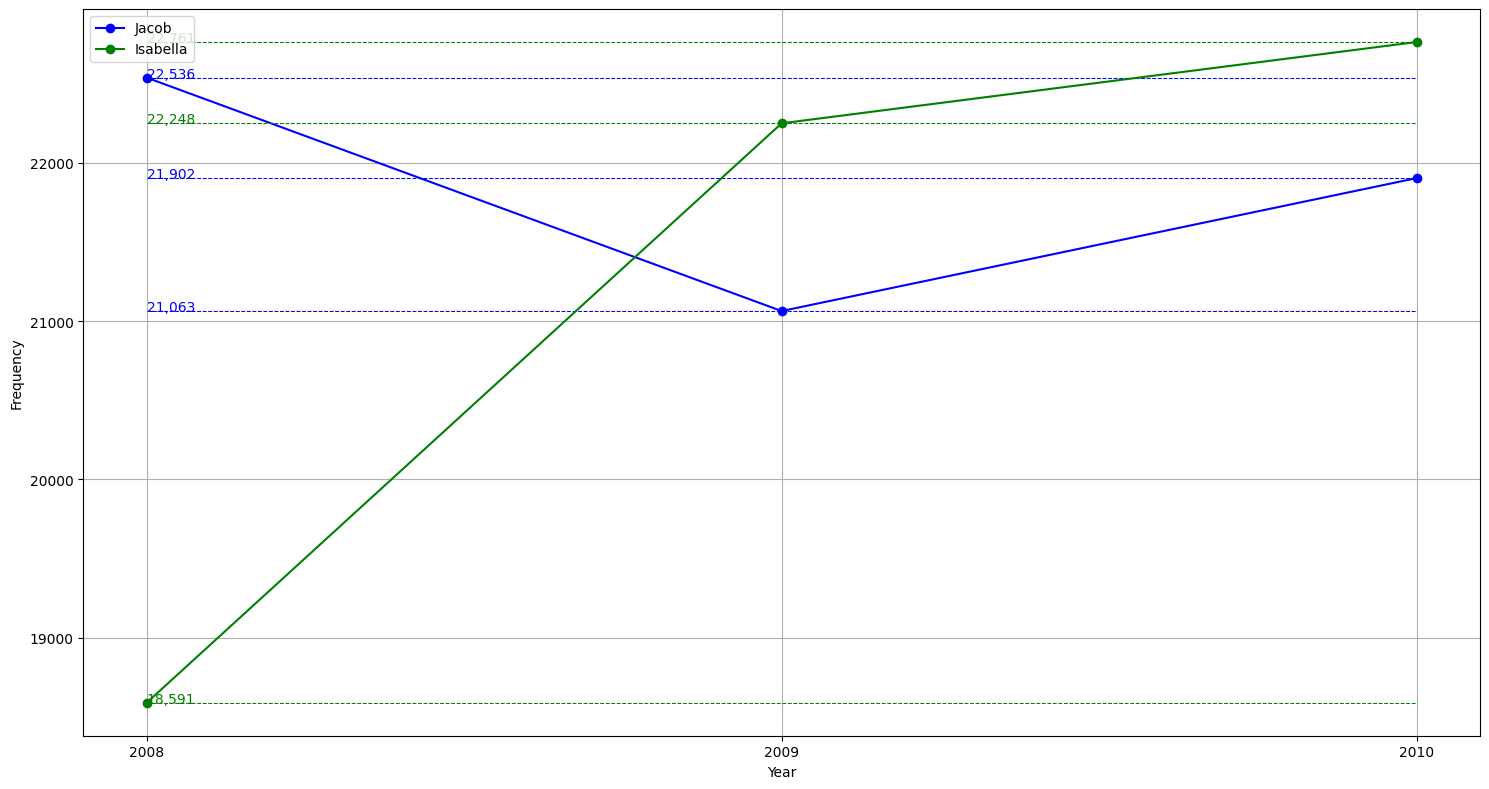

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
xmin = names_df.index.min()
xmax = names_df.index.max()

for name, color in zip(most_used_names, COLORS):
    ax.plot(names_df[name], color=color, marker='o', label=name)
    ax.hlines(names_df[name], xmin=xmin, xmax=xmax, color=color, linewidth=.75, linestyle='--')
    for freq in names_df[name]:
        ax.text(xmin, freq, format(freq, ',.0f'), color=color)

ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
ax.set_xticks(names_df.index)
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()